In [2]:
%load_ext autoreload
%autoreload 2
import intervention_SR as isr
import numpy as np
import matplotlib.pyplot as plt
from SRtools import SR_hetro as srh
from SRtools import presets

In [3]:
print(presets.get_preset_names())

['mice_M', 'mice_F', 'yeast', 'celegance', 'ecoli', 'cats_BPH', 'drosophila_853', 'drosophila_707', 'drosophila_441', 'drosophila_217', 'humans_M_combined', 'humans_F_combined', 'Sweden_M_1910_hetro', 'Sweden_F_1910_homo', 'Sweden_F_1910_hetro', 'Denmark_M_1900', 'Denmark_M_1900_homo', 'Denmark_M_1890', 'Denmark_M_1890_homo', 'Denmark_F_1900', 'Denmark_F_1890', 'Staffy_vetCompass', 'Labradors_vetCompass', 'Jack_Russell_vetCompass', 'German_Shepherd_vetCompass']


In [4]:
print( presets.getTheta('Humans M'))

Using alias 'Humans M' -> 'humans_M_combined'
Converting time units: days -> years (s=365.0)
[  3.04628776 322.87119925 329.19199309  22.688     ]


In [3]:
my_presets = ['Yeast', 'Mice_F', 'Humans M']

In [4]:

# INSERT_YOUR_CODE
# For each preset, save an array of MLs as a function of intervention time
percents = [0, 10,30, 50,70, 90,100,110,120,130]
# percents = [0, 50, 70]
beta_etas={}
MLs_vs_intervention = {}
remaining_lifespan_ratios_medians={}
remaining_lifespan_ratios_means={}
for preset in my_presets:
    config = presets.get_config_params(preset, config_params=['nsteps', 'time_step_multiplier', 'npeople', 't_end'])
    config['time_step_multiplier'] = int(np.ceil(config['time_step_multiplier']/5))
    theta = presets.getTheta(preset)
    beta_eta =theta[1]/theta[0]
    # Get baseline ML
    sim = isr.getInterventionSR(theta, parallel=True, nsteps=config['nsteps'], time_step_multiplier=config['time_step_multiplier'], npeople=config['npeople'], t_end=config['t_end'], intervention_time=0, intervention_duration=0, intervention_type='Transient', intervention_effect=0)
    ML = sim.getMedianLifetime()
    beta_etas[preset] = beta_eta/ML
    intervention_times = [p/100 * ML for p in percents]
    MLs = []
    remaining_lifespan_ratios_medians[preset] = []
    remaining_lifespan_ratios_means[preset] = []
    for t_int in intervention_times:
        sim_int = isr.getInterventionSR(
            theta,
            parallel=True,
            nsteps=config['nsteps'],
            time_step_multiplier=config['time_step_multiplier'],
            npeople=config['npeople'],
            t_end=config['t_end'],
            intervention_time=t_int,
            intervention_duration=0,
            intervention_type='Transient',
            intervention_effect=0.9  # Example effect, adjust as needed
        )
        stats = sim.remaining_lifetime_at_age(age = t_int,types=['median','mean'])
        stats_int = sim_int.remaining_lifetime_at_age(age = t_int,types=['median','mean'])
        remaining_lifespan_ratios_medians[preset].append(stats_int['median']/stats['median'])
        remaining_lifespan_ratios_means[preset].append(stats_int['mean']/stats['mean'])
        MLs.append(sim_int.getMedianLifetime())
    MLs_vs_intervention[preset] = np.array(MLs)
    remaining_lifespan_ratios_medians[preset] = np.array(remaining_lifespan_ratios_medians[preset])
    remaining_lifespan_ratios_means[preset] = np.array(remaining_lifespan_ratios_means[preset])








Using alias 'Yeast' -> 'yeast'
Using alias 'Yeast' -> 'yeast'
Converting time units: days -> generations (s=0.125)
Using alias 'Mice_F' -> 'mice_F'
Using alias 'Mice_F' -> 'mice_F'
Using alias 'Humans M' -> 'humans_M_combined'
Using alias 'Humans M' -> 'humans_M_combined'
Converting time units: days -> years (s=365.0)


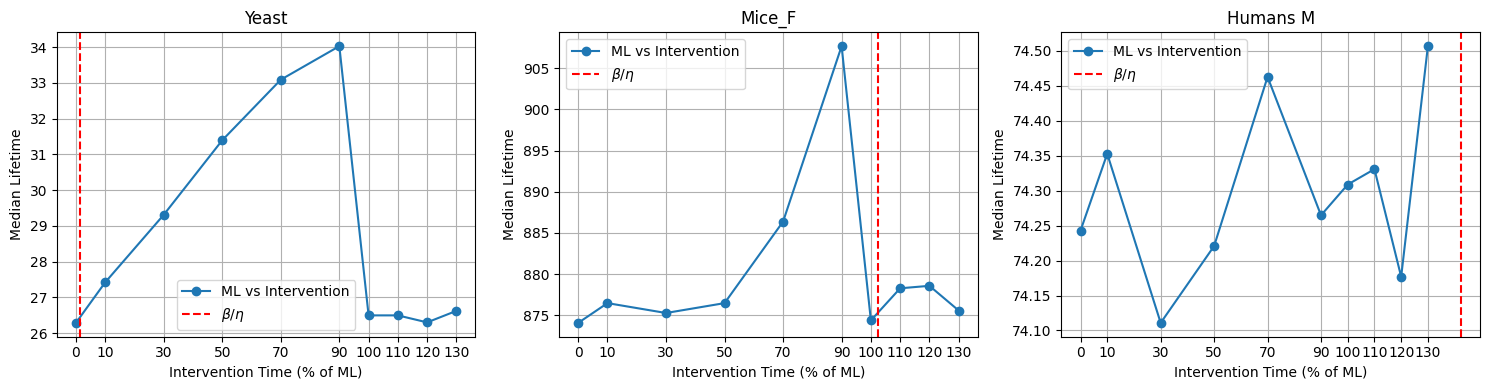

In [5]:
# INSERT_YOUR_CODE

fig, axes = plt.subplots(1, len(my_presets), figsize=(5 * len(my_presets), 4), sharey=False)

if len(my_presets) == 1:
    axes = [axes]

for ax, preset in zip(axes, my_presets):
    ax.plot(percents, MLs_vs_intervention[preset], marker='o', label='ML vs Intervention')
    # Add a vertical line at the relevant beta_eta (in percent ML)
    beta_eta_percent = beta_etas[preset] * 100
    ax.axvline(beta_eta_percent, color='red', linestyle='--', label=r'$\beta/\eta$')
    ax.set_title(f"{preset}")
    ax.set_xlabel("Intervention Time (% of ML)")
    ax.set_ylabel("Median Lifetime")
    ax.grid(True)
    ax.set_xticks(percents)
    ax.legend()

plt.tight_layout()
plt.show()


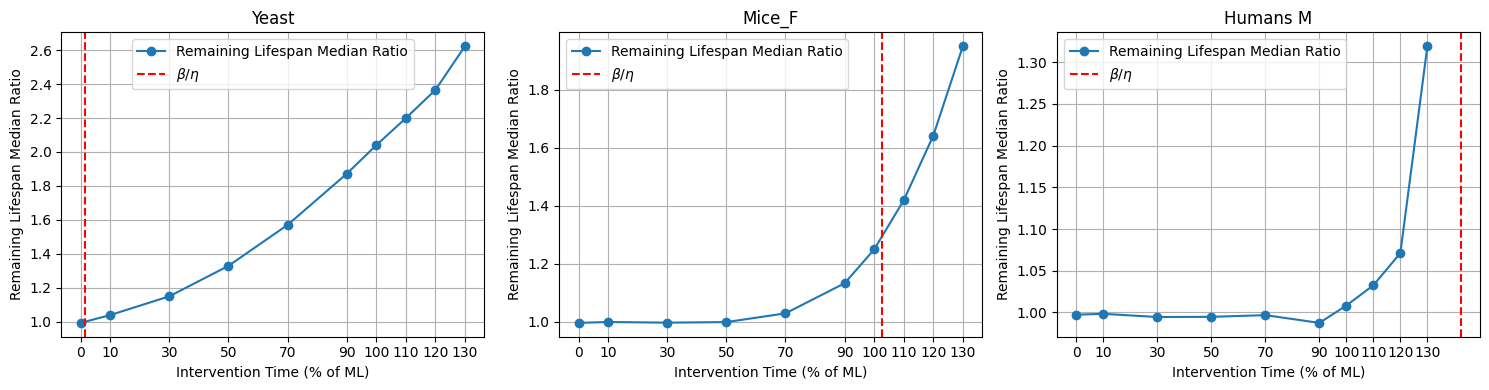

In [6]:
# INSERT_YOUR_REWRITE_HERE

fig, axes = plt.subplots(1, len(my_presets), figsize=(5 * len(my_presets), 4), sharey=False)

if len(my_presets) == 1:
    axes = [axes]

for ax, preset in zip(axes, my_presets):
    ax.plot(
        percents,
        remaining_lifespan_ratios_medians[preset],
        marker='o',
        label='Remaining Lifespan Median Ratio'
    )
    # Add a vertical line at the relevant beta_eta (in percent ML)
    beta_eta_percent = beta_etas[preset] * 100
    ax.axvline(beta_eta_percent, color='red', linestyle='--', label=r'$\beta/\eta$')
    ax.set_title(f"{preset}")
    ax.set_xlabel("Intervention Time (% of ML)")
    ax.set_ylabel("Remaining Lifespan Median Ratio")
    ax.grid(True)
    ax.set_xticks(percents)
    ax.legend()

plt.tight_layout()
plt.show()

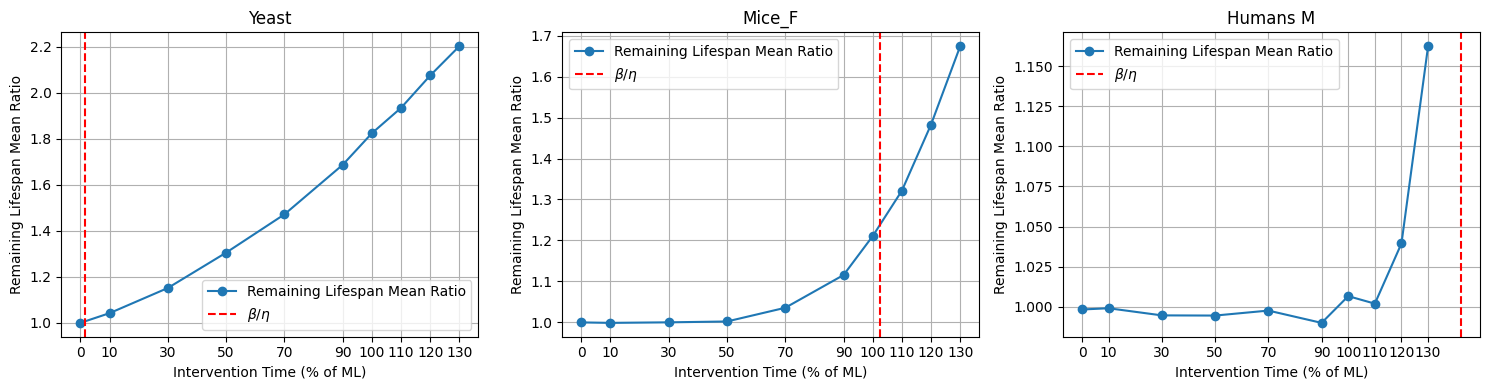

In [7]:

fig, axes = plt.subplots(1, len(my_presets), figsize=(5 * len(my_presets), 4), sharey=False)

if len(my_presets) == 1:
    axes = [axes]

for ax, preset in zip(axes, my_presets):
    ax.plot(
        percents,
        remaining_lifespan_ratios_means[preset],
        marker='o',
        label='Remaining Lifespan Mean Ratio'
    )
    # Add a vertical line at the relevant beta_eta (in percent ML)
    beta_eta_percent = beta_etas[preset] * 100
    ax.axvline(beta_eta_percent, color='red', linestyle='--', label=r'$\beta/\eta$')
    ax.set_title(f"{preset}")
    ax.set_xlabel("Intervention Time (% of ML)")
    ax.set_ylabel("Remaining Lifespan Mean Ratio")
    ax.grid(True)
    ax.set_xticks(percents)
    ax.legend()

plt.tight_layout()
plt.show()

In [8]:
percents = [10, 50,90,110,130]

sims_mice ={}
preset = 'Mice_F'
config = presets.get_config_params(preset, config_params=['nsteps', 'time_step_multiplier', 'npeople', 't_end'])
config['time_step_multiplier'] = int(np.ceil(config['time_step_multiplier']/5))
theta = presets.getTheta(preset)
beta_eta =theta[1]/theta[0]
sim = isr.getInterventionSR(theta, parallel=True, nsteps=config['nsteps'], time_step_multiplier=config['time_step_multiplier'], npeople=config['npeople'], t_end=config['t_end'], intervention_time=0, intervention_duration=0, intervention_type='Transient', intervention_effect=0)
ML = sim.getMedianLifetime()
beta_etas[preset] = beta_eta/ML
intervention_times = [p/100 * ML for p in percents]
for t_int in intervention_times:
    # Run the simulation for mice with this intervention time
    # (Assume you have a function like run_simulation or similar, adjust as needed)
    sim_int = isr.getInterventionSR(
            theta,
            parallel=True,
            nsteps=config['nsteps'],
            time_step_multiplier=config['time_step_multiplier'],
            npeople=config['npeople'],
            t_end=config['t_end'],
            intervention_time=t_int,
            intervention_duration=0,
            intervention_type='Transient',
            intervention_effect=0.9 
    )

    sims_mice[t_int] = sim_int


Using alias 'Mice_F' -> 'mice_F'
Using alias 'Mice_F' -> 'mice_F'


Using alias 'Mice_F' -> 'mice_F'
Using alias 'Mice_F' -> 'mice_F'
Using alias 'Mice_F' -> 'mice_F'
Using alias 'Mice_F' -> 'mice_F'
Using alias 'Mice_F' -> 'mice_F'


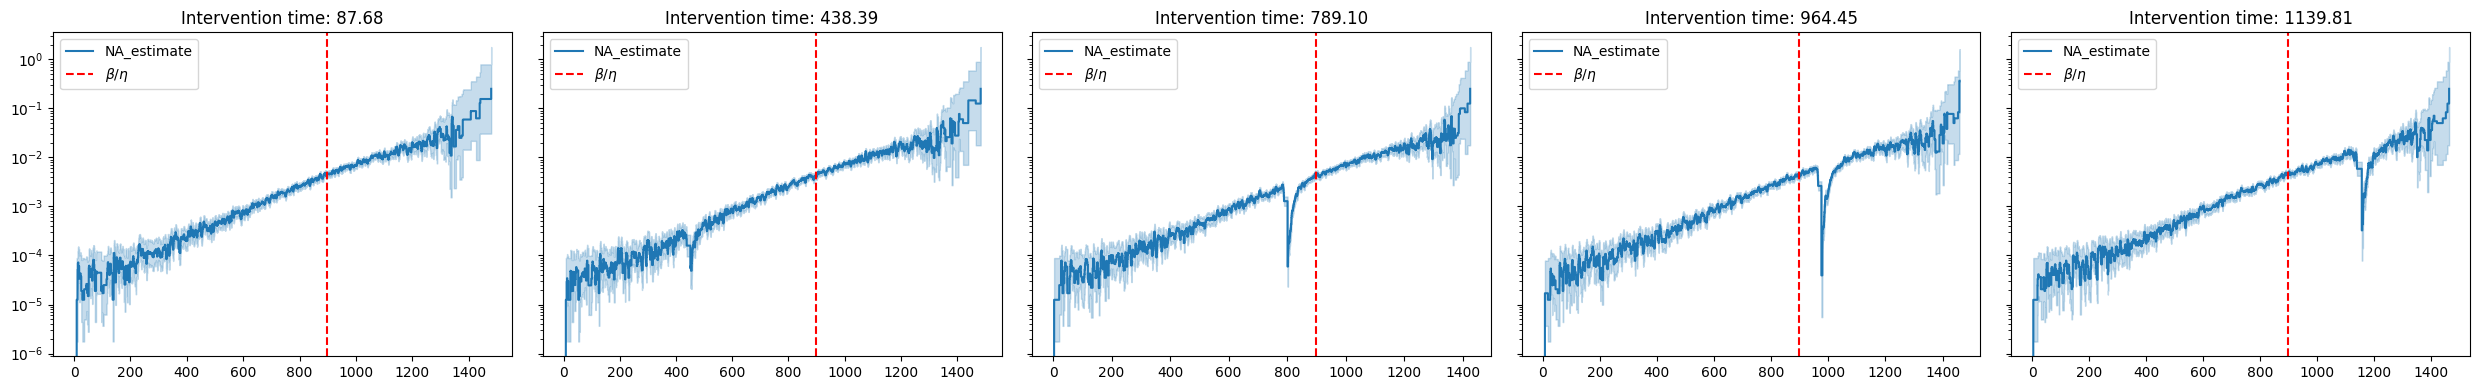

In [9]:
import matplotlib.pyplot as plt

n = len(sims_mice)
fig, axes = plt.subplots(1, n, figsize=(5 * n, 4), sharey=True)

if n == 1:
    axes = [axes]

for ax, (t_int, sim) in zip(axes, sims_mice.items()):
    sim.plotHazard(ax=ax)
    # Get theta for this sim (assume same theta as above)
    theta = sim.theta if hasattr(sim, "theta") else None
    if theta is None:
        # fallback to the theta used above
        theta = presets.getTheta(preset)
    beta_eta = theta[1] / theta[0]
    ax.axvline(beta_eta, color='red', linestyle='--', label=r'$\beta/\eta$')
    ax.set_title(f"Intervention time: {t_int:.2f}")
    ax.set_yscale('log')
    ax.legend()

plt.tight_layout()
plt.show()


